# Choveu muito no Natal em Belém? 
dados históricos de chuvas diárias de 1961 a 2019
<br>
fonte de dados: http://www.inmet.gov.br/portal/index.php?r=bdmep/bdmep

In [3]:
library(lubridate)
library(ggplot2)
library(ISLR)

In [1]:

Arquivo  = "~/Dropbox/Tecnologia/Datascience/Projetos/R/dados_metereologicos_belem/dataset/dados_metereologicos.csv"
DataFrameR = read.csv(Arquivo, sep = ";")


In [20]:

DataFrameR[0:15,]


Estacao,Data,Hora,Precipitacao,X
<int>,<fct>,<int>,<dbl>,<lgl>
82191,02/01/1961,1200,"0,0",NA
82191,03/01/1961,1200,"2,9",NA
82191,04/01/1961,1200,"27,4",NA
82191,05/01/1961,1200,"7,2",NA
82191,06/01/1961,1200,"16,1",NA
82191,07/01/1961,1200,"0,0",NA
82191,08/01/1961,1200,"7,2",NA
82191,09/01/1961,1200,"5,9",NA
82191,10/01/1961,1200,"13,8",NA


In [4]:
# Descrição dos dados
summary(DataFrameR)

    Estacao              Data            Hora       Precipitacao    
 Min.   :82191   01/01/1962:    1   Min.   :1200   Min.   :  0.000  
 1st Qu.:82191   01/01/1963:    1   1st Qu.:1200   1st Qu.:  0.000  
 Median :82191   01/01/1964:    1   Median :1200   Median :  2.800  
 Mean   :82191   01/01/1968:    1   Mean   :1200   Mean   :  8.499  
 3rd Qu.:82191   01/01/1969:    1   3rd Qu.:1200   3rd Qu.: 11.700  
 Max.   :82191   01/01/1970:    1   Max.   :1200   Max.   :200.800  
                 (Other)   :20524                                   
    X          
 Mode:logical  
 NA's:20530    
               
               
               
               
               

In [5]:
# tipos de dados do DataFrame

str(DataFrameR)

'data.frame':	20530 obs. of  5 variables:
 $ Estacao     : int  82191 82191 82191 82191 82191 82191 82191 82191 82191 82191 ...
 $ Data        : Factor w/ 20530 levels "01/01/1962","01/01/1963",..: 667 1343 2019 2695 3370 4044 4716 5392 6067 6741 ...
 $ Hora        : int  1200 1200 1200 1200 1200 1200 1200 1200 1200 1200 ...
 $ Precipitacao: num  0 2.9 27.4 7.2 16.1 0 7.2 5.9 13.8 7.8 ...
 $ X           : logi  NA NA NA NA NA NA ...


In [6]:
# convertendo o campo "DataFrameR$Data" para Date

DataFrameR$Data = dmy(DataFrameR$Data)

In [7]:
# criando um DataFrame com a data 12/25 de todos os anos e selecionando apenas a colunas Data e Precipitação

DataFrameBel = DataFrameR[month(DataFrameR$Data) == 12 & day(DataFrameR$Data) == 25, c("Data","Precipitacao")]

In [8]:
# criando um novo campo para identificar se choveu ou não

DataFrameBel$Label_Choveu = ifelse(DataFrameBel$Precipitacao > 0, "Sim", "Não")
DataFrameBel$Choveu = as.factor(DataFrameBel$Precipitacao > 0)

In [9]:
summary(DataFrameBel)

      Data             Precipitacao   Label_Choveu         Choveu  
 Min.   :1961-12-25   Min.   : 0.00   Length:55          FALSE:11  
 1st Qu.:1978-06-25   1st Qu.: 0.80   Class :character   TRUE :44  
 Median :1991-12-25   Median : 9.00   Mode  :character             
 Mean   :1991-10-26   Mean   :14.36                                
 3rd Qu.:2005-06-25   3rd Qu.:23.85                                
 Max.   :2018-12-25   Max.   :65.80                                

In [10]:
DataFrameBel

,Data,Precipitacao,Label_Choveu,Choveu
,<date>,<dbl>,<chr>,<fct>
358,1961-12-25,0.0,Não,FALSE
723,1962-12-25,0.0,Não,FALSE
1088,1963-12-25,19.6,Sim,TRUE
1726,1967-12-25,0.2,Sim,TRUE
2092,1968-12-25,13.0,Sim,TRUE
2456,1969-12-25,0.0,Não,FALSE
2820,1970-12-25,19.0,Sim,TRUE
3185,1971-12-25,2.6,Sim,TRUE
3551,1972-12-25,46.6,Sim,TRUE


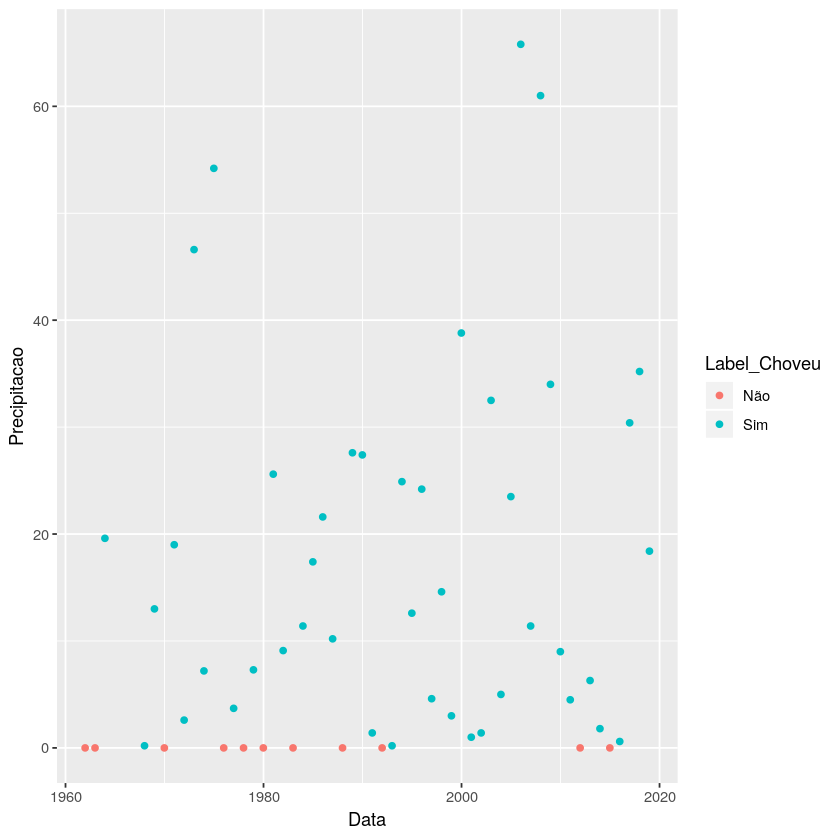

In [11]:
# plotando os Gráficos

qplot(Data, Precipitacao, colour = Label_Choveu, data = DataFrameBel)